In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import math
import pandas as pd
from numpy.fft import fft, ifft,fftshift
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model
#from fancyimpute import SoftImpute
import time

In [2]:
def periodic_corr(x, y):
    """Periodic correlation, implemented using the FFT.

    x and y must be real sequences with the same length.
    """
    n1 = len(x)
    n2 = len(y)
    a = n1*[0]
    b = n2*[0]
    x = x.tolist()
    x.extend(a)
    y = y.tolist()
    y.extend(b)
    result = fftshift(ifft(fft(x) * fft(y).conj()))
    result = result.tolist()
    return result

def gaussian_filter(low_freq,high_freq,window_size,Fs):
    # % Index of low frequency and high frequency in the positive
    #% frequency domain
    ind_low = round(low_freq * window_size/ Fs) + 1
    ind_high = round(high_freq * window_size / Fs) + 1
    filter = [0]*window_size
    sigma = (ind_high - ind_low) / 6
    mean = (ind_high - ind_low) / 2
    gaussian_window = stats.norm.pdf([i+1 for i in range(ind_high - ind_low)], loc=mean, scale=sigma)
    # Positive freq part
    a = [1]*(ind_high - ind_low)
    filter[ind_low-1: ind_high - 1] = a * gaussian_window
    # Negative freq part
    filter[window_size - ind_high : window_size - ind_low] = a * gaussian_window
    return filter

In [3]:
window_size = 5 * 60 * 50
low_freq = 0
high_freq = 0.5
Fs = 100
filter_Y = gaussian_filter(low_freq,high_freq,window_size*2,Fs)
num = window_size

In [4]:
w_sigma = window_size / 2
w_mean = window_size / 2
gaussian_window = stats.norm.pdf([i+1 for i in range(window_size)],loc = w_mean,scale = w_sigma)

0.0539705753326416


[0.2,
 -1.4000000000000001,
 5.300000000000001,
 10.600000000000001,
 -5.9,
 -21.3,
 -30.6,
 12.200000000000001,
 -2.6]

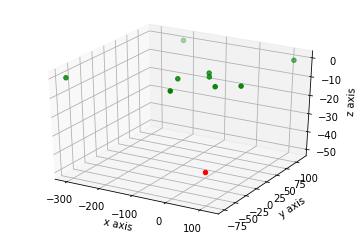

In [5]:
start = time.time()
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
#x = [2,30,-14,53,106,-77,8,-59,-213,-306,-122,234,160,88,-26,62]
#y = [6,27,18,-21,-5,56,31,-17,112,-75,-107,167,-255,233,-58,-133]
#z = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
x = [2,-14,53,106,-59,-213,-306,122,-26]
y = [6,18,-21,-5,-17,112,-75,107,-58]
z = [0,0,0,0,0,0,0,0,0]
ax1.scatter(0,0,-50,c='r',marker='o')
ax1.scatter(x,y,z,c='g',marker='o')
ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')
end = time.time()
print(end-start)
x = [i*0.1 for i in x]
y = [i*0.1 for i in y]
x

In [6]:
distance = []
for i in range(len(z)):
    distance.append(math.sqrt(5**2 + x[i]**2 + y[i]**2))
print(distance)

[5.039841267341661, 5.495452665613635, 7.582875444051551, 11.730728877610291, 7.918333157931662, 24.579056125083405, 31.900000000000002, 16.980282683159313, 8.087026647662292]


In [11]:
#large = [i for i in distance if i > 200]
threshold = 32
mudistance = np.zeros((len(z),len(z)))
for i in range(len(z)):
    for j in range(len(z)):
        if i<j:
            d = math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)
            if d<threshold:
                mudistance[i,j] = d
mudistance

array([[ 0.        ,  2.        ,  5.77061522, 10.45801128,  6.51920241,
        23.97102418, 31.84729188, 15.68470593,  6.98569968],
       [ 0.        ,  0.        ,  7.75241898, 12.2184287 ,  5.70087713,
        22.00840748, 30.64522801, 16.25330736,  7.69415362],
       [ 0.        ,  0.        ,  0.        ,  5.53624421, 11.20714058,
        29.7397041 , 36.30385654, 14.54132044,  8.7235314 ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 16.54357881,
        33.97793402, 41.79042953, 11.3137085 , 14.22427503],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        20.08905174, 25.37183478, 21.94014585,  5.26307895],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 20.88492279, 33.50373114, 25.27231687],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , 46.50892387, 28.05155967],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [ ]:
w_sigma = window_size / 2
w_mean = window_size / 2
gaussian_window = stats.norm.pdf([i+1 for i in range(window_size)],loc = w_mean,scale = w_sigma)

In [ ]:
lag = distance
mean = []
length = len(lag)
for i in range(length):
    mean.append(7000 + lag[i])
sigma = 100

data = []
for i in range(length):
    data.append(stats.norm.pdf([t+1 for t in range(num)], loc=mean[i], scale=sigma))
    


In [ ]:
delta = 0.01
mat = np.zeros((length,length))
for i in range(length):
    data_prac = []
    data_prac.append(data[i] / np.max(abs(data[i])))
    for j in range(length):
        if mudistance[i,j] != 0:
            data_prac.append((data[j] / np.max(abs(data[j])) + delta * np.random.randn(num) * mudistance[i,j]/threshold)*gaussian_window)
        else:
            data_prac.append(0)
    for k in range(length):
        if type(data_prac[k+1]) == int:
            continue
        elif i != k:
            Y = np.array(periodic_corr(data_prac[0],data_prac[k+1]))
            frq_Y = fft(Y)
            frq_Y = frq_Y * filter_Y
            Y_filter = ifft(frq_Y).real
            # plt.plot(Y.real)
            # num - abs(Y.real).tolist().index(max(abs(Y.real)))
            FFT = fft(Y_filter)
            angle = np.angle(FFT[:80])
            angle_odd = [angle[2 * i + 1] for i in range(40)]
            # plt.plot(np.unwrap(angle_even))
            # plt.plot(np.unwrap(angle_odd))
            reg = linear_model.LinearRegression()
            angle_odd = np.unwrap(angle_odd).reshape(-1, 1)
            reg.fit(angle_odd, [i for i in range(40)])
            mat[i,k] = 1/reg.coef_

In [ ]:
for i in range(length):
    for j in range(length):
        if i > j:
            mat[i,j] = -mat[j,i]
print(mat)
X = np.array([[math.exp(mat[i][j]) for j in range(len(mat[i]))] for i in range(len(mat))])
print(X)
evals = abs(np.linalg.eigvals(X))
sorted_indices = np.argsort(evals)
k = 14
topk_evecs = evals[sorted_indices[:-k-1:-1]]
print(topk_evecs)
plt.plot(topk_evecs)

In [ ]:
X_incomplete = X.copy()
for i in range(length):
    for j in range(length):
        if X[i,j] == 1 and i != j:
            X_incomplete[i,j] = np.nan
        
softimpute = SoftImpute()
X_filled = softimpute.complete(X_incomplete)
evals = abs(np.linalg.eigvals(X_filled))
sorted_indices = np.argsort(evals)
k = 5
topk_evecs = evals[sorted_indices[:-k-1:-1]]
print(topk_evecs)
plt.plot(topk_evecs)